<a href="https://colab.research.google.com/github/sankhla2/Youtube_Comment_Classification_Unsuperviced_Minor_project/blob/main/Youtube_Comment_Classification_Unsuperviced_Minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering,SpectralClustering,KMeans
from scipy.cluster.vq import vq, kmeans, whiten
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score
from sklearn.decomposition import PCA
import plotly.express as px
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## taking the dataset
dataset = pd.read_csv("/content/drive/MyDrive/PRML LABs/PRML Minor Project/YT_Videos_Comments.csv")

<ipython-input-4-6ea2764610de>:2: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/content/drive/MyDrive/PRML LABs/PRML Minor Project/YT_Videos_Comments.csv")


In [ ]:
dataset

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z
...,...,...,...,...,...,...,...,...,...
861957,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,"hey girl,make more vdos and make it lengthy .....","hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z
861958,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Third,Third,Izzo Mapping,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z
861959,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,third,third,Indecisive,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z
861960,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Second,Second,Nathan,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z


In [ ]:
# separating the comments
X = dataset[["Comment (Displayed)","Comment (Actual)"]]

In [ ]:
X

,Comment (Displayed),Comment (Actual)
0,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...
1,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a..."
2,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...
3,you looks pretty 😍,you looks pretty 😍
4,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...
...,...,...
861957,"hey girl,make more vdos and make it lengthy .....","hey girl,make more vdos and make it lengthy ....."
861958,Third,Third
861959,third,third
861960,Second,Second


In [ ]:
np.sum(pd.isnull(X))

Comment (Displayed)    467375
Comment (Actual)       482881
dtype: int64

In [ ]:
#Removing the NAN
X = X.dropna()

In [ ]:
np.sum(pd.isnull(X))

Comment (Displayed)    0
Comment (Actual)       0
dtype: int64

In [ ]:
#storing for later use
X.to_csv("/content/drive/MyDrive/YTCshort.csv",index = False)

In [ ]:
#loading the comment
X = pd.read_csv("/content/drive/MyDrive/YTCshort.csv")

In [ ]:
#taking the sample
X_disp = X["Comment (Displayed)"]
X_disp2 = X_disp.sample(10000,random_state=42)

In [ ]:
# Stopping and lemmatizing the comments
corpus = []
for i in range(0, 10000):
  review = re.sub('[^a-zA-Z]', ' ', X_disp2.iloc[i])
  review = review.lower()
  review = review.split()
  wnl = WordNetLemmatizer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [wnl.lemmatize(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
X_disp3 = np.array(corpus)

In [ ]:
X_disp3

array(['wow new challenge not long first', 'nigeria pdp apc want',
       'clue came across feed super interesting ive heard clue knew caused not know knowing half battle',
       ...,
       'href http www youtube com watch v gc pn eire amp flipping page forum second quot yay passed quot',
       'hey great idea let electric car dont need grid charge car home car power home power outage internet wireless cell phone',
       'would imagine would opportunity maybe track microorganism evolved time mean given deep go somewhat correlate age said microorganism wonder reverse family tree sort done perhaps see oldest microorganism relate current everyday one least similar number offshoot may deal various challenge year'],
      dtype='<U4229')

In [ ]:
test_X = pd.read_excel("/content/drive/MyDrive/PRML LABs/PRML Minor Project/processed_batch (1).xlsx")

In [ ]:
test_X = test_X[["Comment (Displayed)","Classification"]]
test_Y = test_X["Classification"]
test_X = test_X["Comment (Displayed)"]

In [ ]:
# test_Y.replace(["spam","not spam"],[1,0],inplace = True)
# test_Y

In [ ]:
len(test_X)

2948

In [ ]:
# stopping and lemmatizing the test samples
corpus = []
for i in range(0,992):
  review = re.sub('[^a-zA-Z]', ' ', test_X.iloc[i])
  review = review.lower()
  review = review.split()
  wnl = WordNetLemmatizer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [wnl.lemmatize(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
test_X = np.array(corpus)

In [ ]:
test_X

In [ ]:
# converting into feature vector
vectorizer = CountVectorizer()
vectorizer = vectorizer.fit(X_disp3)
X_disp4= vectorizer.transform(X_disp3)
test_X = vectorizer.transform(test_X)
features = vectorizer.get_feature_names_out()
X_disp4 = pd.DataFrame(X_disp4.toarray(),columns = features)
test_X = pd.DataFrame(test_X.toarray(),columns = features)


In [ ]:
X_disp4 = X_disp4.drop(X_disp4.iloc[((np.sum(X_disp4.T)).values == 0)].index)

In [ ]:
test_X = test_X.drop(test_X.iloc[((np.sum(test_X.T)).values == 0)].index)
test_Y = test_Y.iloc[test_X.index]

In [ ]:
X_disp4.shape

(9885, 14583)

In [ ]:
# appling the Agglomeration Clustering with difference metrics

In [ ]:
agg_clus = AgglomerativeClustering(n_clusters=2,linkage = 'single',metric='euclidean').fit(X_disp4)
agg_clus2 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='manhattan').fit(X_disp4)
agg_clus3 = AgglomerativeClustering(n_clusters=2,linkage = 'single',metric='cosine').fit(X_disp4)
agg_clus4 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity = 'correlation').fit(X_disp4)
agg_clus5 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity = 'chebyshev').fit(X_disp4)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
Y_1 = agg_clus.labels_
Y_2 = agg_clus2.labels_
Y_3 = agg_clus3.labels_
Y_4 = agg_clus4.labels_
Y_5 = agg_clus5.labels_
l = [Y_1,Y_2,Y_3,Y_4,Y_5]
for i in l:
  print(np.unique(i,return_counts=True))
  

(array([0, 1]), array([9884,    1]))
(array([0, 1]), array([9884,    1]))
(array([0, 1]), array([9884,    1]))
(array([0, 1]), array([9884,    1]))
(array([0, 1]), array([9884,    1]))


In [ ]:
#evaluating them

In [ ]:
count = 0
for i in l:
  count+=1
  print(f'for cluster : {count}')
  print(f"calinski_harabasz_score : {calinski_harabasz_score(X_disp4,i)}")
  print(f"silhouette_score : {silhouette_score(X_disp4,i)}")
  print(f"davies_bouldin_score : {davies_bouldin_score(X_disp4,i)}")


for cluster : 1
calinski_harabasz_score : 301.16037036777936
silhouette_score : 0.9303769966170192
davies_bouldin_score : 0.046259230498949644
for cluster : 2
calinski_harabasz_score : 187.661133440361
silhouette_score : 0.9122325643292153
davies_bouldin_score : 0.058296837115856835
for cluster : 3
calinski_harabasz_score : 0.06664780114105538
silhouette_score : -0.3487381308232402
davies_bouldin_score : 3.069906571493308
for cluster : 4
calinski_harabasz_score : 0.1673160825523939
silhouette_score : -0.2777871826203713
davies_bouldin_score : 1.9375060836447837
for cluster : 5
calinski_harabasz_score : 301.16037036777936
silhouette_score : 0.9303769966170192
davies_bouldin_score : 0.046259230498949644


In [ ]:
# appling PCA

In [ ]:
pca = PCA(n_components=2000).fit(X_disp4)
X_disp4_p = pca.transform(X_disp4)
test_X_p = pca.transform(test_X)

In [ ]:
# appling the above process

In [ ]:
agg_clusp = AgglomerativeClustering(n_clusters=2,linkage = 'single',metric='euclidean').fit(X_disp4_p)
agg_clusp2 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='manhattan').fit(X_disp4_p)
agg_clusp3 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='cosine').fit(X_disp4_p)
agg_clusp4 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='correlation').fit(X_disp4_p)
agg_clusp5 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='chebyshev').fit(X_disp4_p)
Yp_1 = agg_clusp.labels_
Yp_2 = agg_clusp2.labels_
Yp_3 = agg_clusp3.labels_
Yp_4 = agg_clusp4.labels_
Yp_5 = agg_clusp5.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
ll = [Yp_1,Yp_2,Yp_3,Yp_4,Yp_5]
for i in ll:
  print(np.unique(i,return_counts=True))
  

(array([0, 1]), array([9884,    1]))
(array([0, 1]), array([9884,    1]))
(array([0, 1]), array([9884,    1]))
(array([0, 1]), array([9884,    1]))
(array([0, 1]), array([9884,    1]))


In [ ]:
count1 = 0
for i in ll:
  count1+=1
  print(f'for cluster : {count1}')
  print(f"calinski_harabasz_score : {calinski_harabasz_score(X_disp4_p,i)}")
  print(f"silhouette_score : {silhouette_score(X_disp4_p,i)}")
  print(f"davies_bouldin_score : {davies_bouldin_score(X_disp4_p,i)}")

for cluster : 1
calinski_harabasz_score : 326.41293975064144
silhouette_score : 0.9349383459419742
davies_bouldin_score : 0.04273981703456355
for cluster : 2
calinski_harabasz_score : 39.276338255826246
silhouette_score : 0.8170535424280353
davies_bouldin_score : 0.12164511858572742
for cluster : 3
calinski_harabasz_score : 10.45099204402978
silhouette_score : 0.6621655425834929
davies_bouldin_score : 0.23558697558053887
for cluster : 4
calinski_harabasz_score : 10.45099204402978
silhouette_score : 0.6621655425834929
davies_bouldin_score : 0.23558697558053887
for cluster : 5
calinski_harabasz_score : 326.41293975064144
silhouette_score : 0.9349383459419742
davies_bouldin_score : 0.04273981703456355


In [ ]:
# appling on the testing data

In [ ]:
agg_clus = AgglomerativeClustering(n_clusters=2,linkage = 'single',metric='euclidean').fit(test_X)
agg_clus2 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='manhattan').fit(test_X)
agg_clus3 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='cosine').fit(test_X)
agg_clus4 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='correlation').fit(test_X)
agg_clus5 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='chebyshev').fit(test_X)
Yt_1 = agg_clus.labels_
Yt_2 = agg_clus2.labels_
Yt_3 = agg_clus3.labels_
Yt_4 = agg_clus4.labels_
Yt_5 = agg_clus5.labels_


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
Yt_1 = agg_clus.labels_
Yt_2 = agg_clus2.labels_
Yt_3 = agg_clus3.labels_
Yt_4 = agg_clus4.labels_
Yt_5 = agg_clus5.labels_
lll = [Yt_1,Yt_2,Yt_3,Yt_4,Yt_5]
for i in lll:
  print(np.unique(i,return_counts=True))

(array([0, 1]), array([939,   1]))
(array([0, 1]), array([939,   1]))
(array([0, 1]), array([939,   1]))
(array([0, 1]), array([939,   1]))
(array([0, 1]), array([939,   1]))


In [ ]:
count2 = 0
for i in lll:
  count2+=1
  print(f'for cluster : {count2}')
  print(f"calinski_harabasz_score : {calinski_harabasz_score(test_X,i)}")
  print(f"silhouette_score : {silhouette_score(test_X,i)}")
  print(f"davies_bouldin_score : {davies_bouldin_score(test_X,i)}")

for cluster : 1
calinski_harabasz_score : 41.816109196016605
silhouette_score : 0.8144377806728943
davies_bouldin_score : 0.12255256773671462
for cluster : 2
calinski_harabasz_score : 41.816109196016605
silhouette_score : 0.8144377806728943
davies_bouldin_score : 0.12255256773671462
for cluster : 3
calinski_harabasz_score : 0.5650245953934909
silhouette_score : -0.06896952056510466
davies_bouldin_score : 1.0411152545919422
for cluster : 4
calinski_harabasz_score : 0.11725949435539632
silhouette_score : -0.35452038520854134
davies_bouldin_score : 2.2861069950263917
for cluster : 5
calinski_harabasz_score : 30.022504441965307
silhouette_score : 0.7835470731672468
davies_bouldin_score : 0.14400441159251787


In [ ]:
agg_clusp = AgglomerativeClustering(n_clusters=2,linkage = 'single',metric='euclidean').fit(test_X_p)
agg_clusp2 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='manhattan').fit(test_X_p)
agg_clusp3 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='cosine').fit(test_X_p)
agg_clusp4 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='correlation').fit(test_X_p)
agg_clusp5 = AgglomerativeClustering(n_clusters=2,linkage = 'single',affinity='chebyshev').fit(test_X_p)
Ytp_1 = agg_clusp.labels_
Ytp_2 = agg_clusp2.labels_
Ytp_3 = agg_clusp3.labels_
Ytp_4 = agg_clusp4.labels_
Ytp_5 = agg_clusp5.labels_


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
llll = [Ytp_1,Ytp_2,Ytp_3,Ytp_4,Ytp_5]
for i in llll:
  print(np.unique(i,return_counts=True))

(array([0, 1]), array([939,   1]))
(array([0, 1]), array([939,   1]))
(array([0, 1]), array([939,   1]))
(array([0, 1]), array([939,   1]))
(array([0, 1]), array([939,   1]))


In [ ]:
count3 = 0
for i in llll:
  count3+=1
  print(f'for cluster : {count3}')
  print(f"calinski_harabasz_score : {calinski_harabasz_score(test_X_p,i)}")
  print(f"silhouette_score : {silhouette_score(test_X_p,i)}")
  print(f"davies_bouldin_score : {davies_bouldin_score(test_X_p,i)}")

for cluster : 1
calinski_harabasz_score : 46.45949825726755
silhouette_score : 0.8255331970603988
davies_bouldin_score : 0.11487810890569611
for cluster : 2
calinski_harabasz_score : 46.45949825726755
silhouette_score : 0.8255331970603988
davies_bouldin_score : 0.11487810890569611
for cluster : 3
calinski_harabasz_score : 0.7172698936309798
silhouette_score : 0.012098686560669668
davies_bouldin_score : 0.9116756014286683
for cluster : 4
calinski_harabasz_score : 0.7172698936309798
silhouette_score : 0.012098686560669668
davies_bouldin_score : 0.9116756014286683
for cluster : 5
calinski_harabasz_score : 36.96297012921366
silhouette_score : 0.8059438335930682
davies_bouldin_score : 0.12835577985464325


In [ ]:
#evaluating on the testing data

In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

In [ ]:
test_Y

0      0
1      0
2      1
3      1
4      0
      ..
987    1
988    1
989    0
990    0
991    0
Name: Classification, Length: 940, dtype: int64

In [ ]:
adjusted_mutual_info_score(test_Y,Yt_1)

-0.0001478403830191658

In [ ]:
adjusted_mutual_info_score(test_Y,Yt_2)

-0.0001478403830191658

In [ ]:
adjusted_mutual_info_score(test_Y,Yt_3)

0.00016375145562299589

In [ ]:
adjusted_mutual_info_score(test_Y,Yt_4)

0.00016375145562299589

In [ ]:
adjusted_mutual_info_score(test_Y,Yt_5)

-0.0001478403830191658

In [ ]:
adjusted_mutual_info_score(test_Y,Ytp_1)

-0.0001478403830191658

In [ ]:
adjusted_mutual_info_score(test_Y,Ytp_2)

-0.0001478403830191658

In [ ]:
adjusted_mutual_info_score(test_Y,Ytp_3)

0.00016375145562299589

In [ ]:
adjusted_mutual_info_score(test_Y,Ytp_4)

0.00016375145562299589

In [ ]:
adjusted_mutual_info_score(test_Y,Ytp_5)

-0.0001478403830191658

In [ ]:
np.sum(X_disp4==1)

aa                  2
aaaaaaaaaaaaaaaa    1
aaaaand             1
aaaah               1
aaaand              1
                   ..
zooxanthellae       1
zurich              1
zv                  1
zyrtec              1
zz                  1
Length: 14583, dtype: int64

In [ ]:
X_disp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9885 entries, 0 to 9999
Columns: 14583 entries, aa to zz
dtypes: int64(14583)
memory usage: 1.1 GB


In [ ]:
#@title After vectorization, X_disp4 is a 14456 dimension dataset. Therefore, we need to reduce the dimension to reduce the complexity. We performed PCA and reduced the dimension to 1500.


In [ ]:
X_disp4_056 = PCA(n_components=1500).fit_transform(X_disp4)

In [ ]:
X_disp4_056

array([[-2.78812614e-01,  3.24345063e-03, -3.66118991e-02, ...,
        -8.84189843e-03,  8.09674786e-03, -1.60412421e-03],
       [-4.25046515e-01,  5.91301584e-02, -1.80728659e-01, ...,
        -1.98597689e-03, -9.53455556e-04, -2.09387553e-03],
       [-2.59818930e-01, -1.19935062e-02, -6.97608047e-03, ...,
         1.03984412e-01, -2.61298498e-02,  3.48074256e-02],
       ...,
       [ 8.29597934e-02, -7.72568436e-01,  1.54375218e+00, ...,
         4.09233308e-03,  2.05939544e-02, -1.07592322e-01],
       [-2.62441309e-01, -1.16770895e-03, -6.22617375e-02, ...,
        -3.49136899e-02,  4.09143823e-02, -5.29620091e-02],
       [ 3.76235133e-02, -8.18863972e-02,  2.04227120e-01, ...,
        -1.37635562e-01, -7.13300985e-02, -6.34867029e-02]])

In [ ]:
#@title We performed K-means clustering using scipy library kmeans

In [ ]:
centroids, distortion = kmeans(X_disp4_056, 2)
# Assign each data point to its closest centroid
labels, _ = vq(X_disp4_056, centroids)

In [ ]:
X_disp4_056.shape

(9885, 1500)

In [ ]:
centroids.shape

(2, 1500)

In [ ]:
print(np.sum(labels==0))
print(np.sum(labels==1))

543
9342


In [ ]:
#@title We varied the 'thresh' hyper-parameter provided in scipy kmeans

In [ ]:
import math
Y_disp=[]
clust_size=[]
for thresh in range(10):
    thresh=math.exp(-1*thresh)
    centroids, distortion = kmeans(X_disp4_056, 2, thresh=thresh)
    labels, _ = vq(X_disp4_056, centroids)
    cluster_ids, cluster_sizes = np.unique(labels, return_counts=True)
    Y_disp.append(labels)
    clust_size.append(cluster_sizes)
    print(f"Number of elements asigned to each cluster: {cluster_sizes}")
    

Number of elements asigned to each cluster: [ 457 9428]
Number of elements asigned to each cluster: [ 767 9118]
Number of elements asigned to each cluster: [9114  771]
Number of elements asigned to each cluster: [ 475 9410]
Number of elements asigned to each cluster: [ 465 9420]
Number of elements asigned to each cluster: [ 601 9284]
Number of elements asigned to each cluster: [ 593 9292]
Number of elements asigned to each cluster: [9404  481]
Number of elements asigned to each cluster: [ 582 9303]
Number of elements asigned to each cluster: [9373  512]


In [ ]:
print(labels)

[0 0 0 ... 0 0 0]


In [ ]:
ch_score=[]
sil_score=[]
db_score=[]
for seed in range(10):
    ch_score.append(calinski_harabasz_score(X_disp4_056,Y_disp[seed]))
    sil_score.append(silhouette_score(X_disp4_056,Y_disp[seed]))
    db_score.append(davies_bouldin_score(X_disp4_056,Y_disp[seed]))

k_mean_dict={"Threshold ":[f"exp(-{seed})" for seed in range(10)],"Cluster sizes":clust_size,
             "calinski_harabasz_score":ch_score,"silhouette_score":sil_score,"davies_bouldin_score":db_score} 
pd.DataFrame(k_mean_dict)                

,Threshold,Cluster sizes,calinski_harabasz_score,silhouette_score,davies_bouldin_score
0,exp(-0),"[457, 9428]",607.145883,0.563222,2.420550
1,exp(-1),"[767, 9118]",555.362993,0.477529,2.791626
2,exp(-2),"[9114, 771]",554.502135,0.476916,2.798022
3,exp(-3),"[475, 9410]",603.669856,0.558651,2.453622
4,exp(-4),"[465, 9420]",605.660486,0.561976,2.439460
5,exp(-5),"[601, 9284]",579.389344,0.522051,2.628084
6,exp(-6),"[593, 9292]",580.729307,0.524119,2.617621
7,exp(-7),"[9404, 481]",602.461232,0.556980,2.463680
8,exp(-8),"[582, 9303]",582.582730,0.527028,2.603295
9,exp(-9),"[9373, 512]",595.929838,0.550204,2.523816


In [ ]:
#@title Testing

In [ ]:
#@title We manually labelled some samples for testing our model

In [ ]:
test_data = pd.read_excel('/content/drive/MyDrive/PRML LABs/PRML Minor Project/processed_batch (1).xlsx')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Comment (Displayed)  2948 non-null   object
 1   Unnamed: 1           123 non-null    object
 2   Unnamed: 2           53 non-null     object
 3   Unnamed: 3           19 non-null     object
 4   Unnamed: 4           11 non-null     object
 5   Unnamed: 5           6 non-null      object
 6   Unnamed: 6           3 non-null      object
 7   Unnamed: 7           2 non-null      object
 8   Unnamed: 8           1 non-null      object
 9   Unnamed: 9           1 non-null      object
 10  Classification       2948 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 253.5+ KB


In [ ]:
np.sum(pd.isnull(test_data))

Comment (Displayed)       0
Unnamed: 1             2825
Unnamed: 2             2895
Unnamed: 3             2929
Unnamed: 4             2937
Unnamed: 5             2942
Unnamed: 6             2945
Unnamed: 7             2946
Unnamed: 8             2947
Unnamed: 9             2947
Classification            0
dtype: int64

In [ ]:
#@title Similarly as in training, we performed NLP and vectorization on testing data features.

In [ ]:
# test_disp=test_data['CONTENT']
# test_data_y=test_data['
# ']
test_data = test_data[["Comment (Displayed)","Classification"]]
test_data_y= test_data["Classification"]
test_disp = test_data["Comment (Displayed)"]

In [ ]:
corpus = []
for i in range(0, test_disp.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', test_disp.iloc[i])
  review = review.lower()
  review = review.split()
  wnl = WordNetLemmatizer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [wnl.lemmatize(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
test_disp1 = np.array(corpus)

In [ ]:
test_disp1.shape

(2948,)

In [ ]:
test_disp1

array(['zombie spider bomb damn lab',
       'way le cool seems spider actually muscle extension leg hydraulically controlled force grabbing thing rubber band like action dead muscle also dead grab weak main reason lift stuff little claw hook thing',
       'spider see made terrifying go poking panic button', ..., 'wow',
       'shakira u wiredo', 'shakira best dancer'], dtype='<U2679')

In [ ]:
test_disp2 = vectorizer.transform(test_disp1)
features = vectorizer.get_feature_names_out()
test_disp2 = pd.DataFrame(test_disp2.toarray(),columns = features)

In [ ]:
test_disp2.shape

(2948, 14583)

In [ ]:
test_disp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Columns: 14583 entries, aa to zz
dtypes: int64(14583)
memory usage: 328.0 MB


In [ ]:
#@title Performed PCA on testing features to make the no. of features equal of both training and testing features.

In [ ]:
pca = PCA(n_components=1500)
test_disp2_pca = pca.fit_transform(test_disp2)

In [ ]:
test_disp2_pca.shape

(2948, 1500)

In [ ]:
predictions, _ = vq(test_disp2_pca, centroids)

# Print the resulting predictions
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
import numpy as np
print(np.sum(predictions==1))
print(np.sum(predictions==0))

161
2787


In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score(test_data_y, predictions)


0.015933819224287497

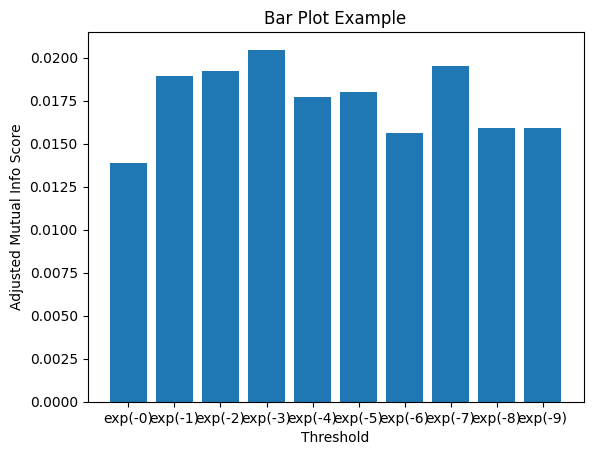

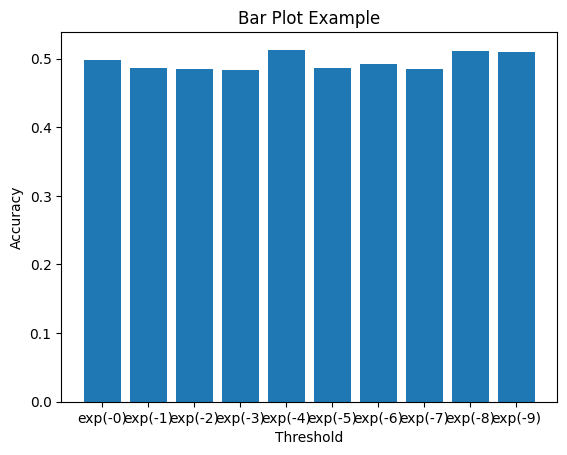

In [ ]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
Y_disp=[]
clust_size=[]
score=[]
acc=[]
for thresh in range(10):
    thresh=math.exp(-1*thresh)
    centroids, distortion = kmeans(X_disp4_056, 2, thresh=thresh)
    labels, _ = vq(X_disp4_056, centroids)
    cluster_ids, cluster_sizes = np.unique(labels, return_counts=True)
    Y_disp.append(labels)
    clust_size.append(cluster_sizes)
    predictions, _ = vq(test_disp2_pca, centroids)
    score.append(adjusted_mutual_info_score(test_data_y, predictions))
    acc.append(accuracy_score(test_data_y, predictions))
fig, ax = plt.subplots()
ax.bar([f"exp(-{seed})" for seed in range(10)], score)

# add some labels and a title
ax.set_xlabel('Threshold')
ax.set_ylabel('Adjusted Mutual Info Score')
ax.set_title('Bar Plot Example')

# display the plot
plt.show()
fig, ax = plt.subplots()
ax.bar([f"exp(-{seed})" for seed in range(10)], acc)

# add some labels and a title
ax.set_xlabel('Threshold')
ax.set_ylabel('Accuracy')
ax.set_title('Bar Plot Example')

# display the plot
plt.show()  

In [ ]:
#@title Spectral Clustering
from sklearn.cluster import OPTICS

clustering = SpectralClustering(n_clusters=2,assign_labels='discretize',affinity='rbf',random_state=0).fit(X_disp4_056 )
clustering2 = SpectralClustering(n_clusters=2,assign_labels='discretize',affinity='nearest_neighbors',random_state=0).fit(X_disp4_056)

Y_111 = clustering.labels_
Y_122 = clustering2.labels_


print(np.unique(Y_111,return_counts= True))
print(np.unique(Y_122,return_counts= True))

print(f"calinski_harabasz_score : {calinski_harabasz_score(X_disp4_056 ,Y_111)}")
print(f"silhouette_score : {silhouette_score(X_disp4_056 ,Y_111)}")
print(f"davies_bouldin_score : {davies_bouldin_score(X_disp4_056 ,Y_111)}")

print(f"calinski_harabasz_score : {calinski_harabasz_score(X_disp4_056 ,Y_122)}")
print(f"silhouette_score : {silhouette_score(X_disp4_056 ,Y_122)}")
print(f"davies_bouldin_score : {davies_bouldin_score(X_disp4_056 ,Y_122)}")       


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


(array([0, 1]), array([9725,  160]))
(array([0, 1]), array([9831,   54]))
calinski_harabasz_score : 152.0313422790834
silhouette_score : 0.6701828233754427
davies_bouldin_score : 3.949600267946655
calinski_harabasz_score : 14.483410676387717
silhouette_score : -0.15268904539611777
davies_bouldin_score : 1.7894698386563548


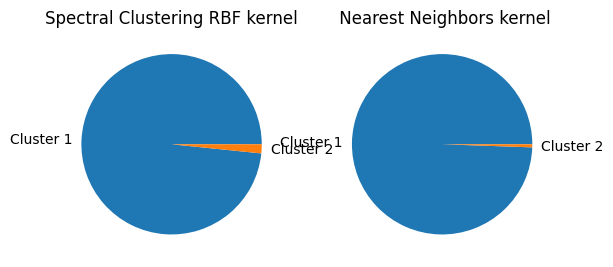

In [ ]:


counts1 = np.unique(Y_111, return_counts=True)[1]
counts2 = np.unique(Y_122, return_counts=True)[1]

fig, axs = plt.subplots(1, 2)
axs[0].pie(counts1, labels=['Cluster 1', 'Cluster 2'])
axs[0].set_title('Spectral Clustering RBF kernel')
axs[1].pie(counts2, labels=['Cluster 1', 'Cluster 2'])
axs[1].set_title(' Nearest Neighbors kernel')
plt.show()

In [ ]:
#@title Calinski harabasz score , Silhouette score , Davies bouldin score Table 
ch_score=[]
sil_score=[]
db_score=[]
Y_seed = [Y_111,Y_122]

for seed in Y_seed:
    ch_score.append(calinski_harabasz_score(X_disp4_056 , seed))
    sil_score.append(silhouette_score(X_disp4_056 , seed))
    db_score.append(davies_bouldin_score(X_disp4_056 , seed))


k_mean_dict={"Random state":[seed for seed in range(2)],"Cluster sizes":2, "calinski_harabasz_score":ch_score,"silhouette_score":sil_score,"davies_bouldin_score":db_score} 
pd.DataFrame(k_mean_dict)      

,Random state,Cluster sizes,calinski_harabasz_score,silhouette_score,davies_bouldin_score
0,0,2,152.031342,0.670183,3.94960
1,1,2,14.483411,-0.152689,1.78947


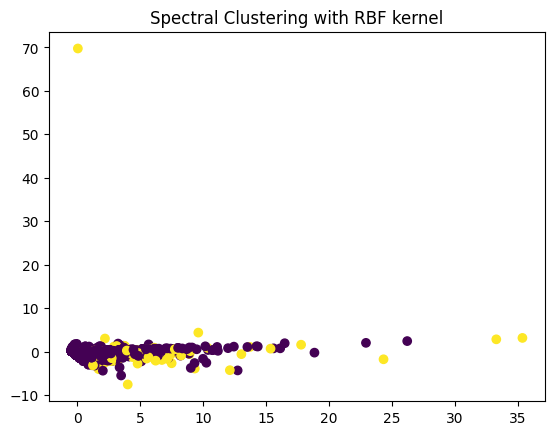

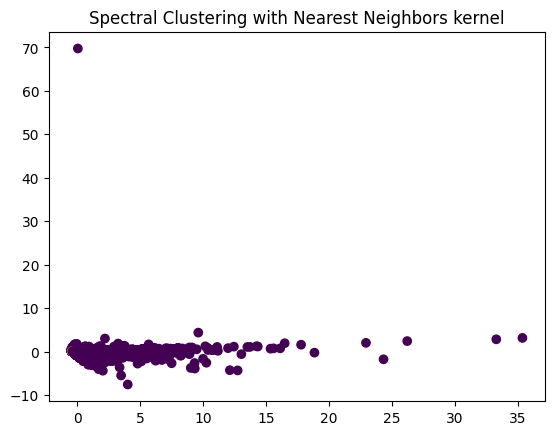

In [ ]:
#@title  Visualization of Clusters
import matplotlib.pyplot as plt

# visualize clusters
plt.scatter(np.asarray(X_disp4_056)[:, 0], np.asarray(X_disp4_056 )[:, 1], c=Y_111)
plt.title("Spectral Clustering with RBF kernel")
plt.show()

plt.scatter(np.asarray(X_disp4_056 )[:, 0], np.asarray(X_disp4_056 )[:, 1], c=Y_122)
plt.title("Spectral Clustering with Nearest Neighbors kernel")
plt.show()
